# Проверка шума данных ПЦР теста на соответствие с нормальным распределением с помощью критерия Колмогорова-Смирнова

In [88]:
import numpy as np
import pandas as pd
from scipy import stats

Прочитаем данные

In [89]:
data = pd.read_csv('pcr_data.csv', delimiter=';', decimal=',')
data.drop(data.columns[-1], axis=1, inplace=True)

Выделим шум

In [90]:
noise = np.array([num - data[col][3:16].mean() for col in data.columns for num in data[col][3:16]])

array([[<Axes: title={'center': '0'}>]], dtype=object)

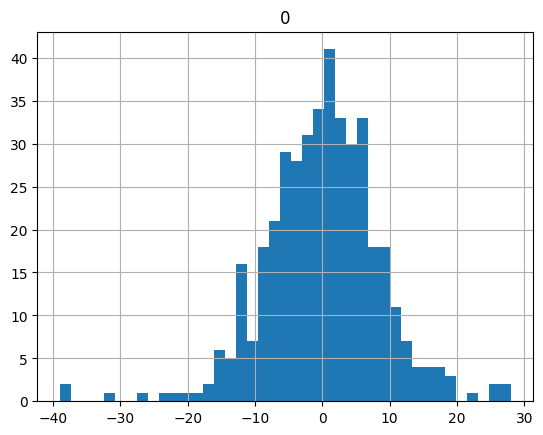

In [91]:
pd.DataFrame(noise).hist(bins = len(noise)//10)

In [92]:
stats.kstest(noise, 'norm', args=(0, noise.std()))

KstestResult(statistic=0.039141103273921285, pvalue=0.5338467949854138, statistic_location=6.711538461538453, statistic_sign=1)

pvalue значительно больше нуля (>0.05), гипотеза о нормальном распределении шума подтверждена